<h2 align="center">Лабораторна робота №6</h2>
<h5 align="center"><i>Роботу виконала студентка групи ФІ-21, Денисенко Анастасія</i></h5>
<p><b>Тема роботи:</b> "Ройовий інтелект для розв'язавання задачі пошуку параметрів нелінійної регресії".</p>
<p><b>Мета роботи:</b> опанувати методи й алгоритми ройового інтелекту для пошуку невідомих параметрів нелінійної регресійної моделі, вивчити основні недоліки класичних градієнтних методів для розв'язування такого роду нелінійих задач. Провести дослідження пошуку невідомих параметрів за класичними принципами машинного навчання.</p>

## Завдання до лабораторної роботи:

1. Обрати три будь-які варіанти з нелінійними регречійними моделями, математичні записи яких наведено у підроздлі 3.1. Взяти відповідні дані з файлу, який має назву "DataRegression.xlsx".
2. Програмно перемішати дані для створення тренувальної (навчальної) та валідаційної (тестової) вибірок з метою здійчнення машинного навчання на основі методів й алгоритмів ройового інтелекту. Взяти дослідження 75% вибірки для навчання та залишкові 25% для верифікації процесу навчання (як варіант - можна взяти 80% / 20%).
3. Програмно реалізувати метод диференціальної еволюції та алгоритм оптимізації роєм частинок для знаходження невідомих параметрів обраних трьох нелінійних регречійних моделей.
4. У розробленому програмному забезпечення врахувати формування динаміки збіжності ітеративного процесу (на кожній ітерації) у вигляді представити після того, як програма закінчить свою роботу. Після виконання роботи програми представити графіки прогнозу на тестовій та навчальній вибірках (як це зроблено у підрозділі 2.3 даної роботи).
5. Модифікувати програму так, щоб графіки, про які було згадано у 5-му пункті відображались в ході роботи програми. Графік оновлювати кожні K ітерацій роботи методу/алгоритму.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from diff_evol import *
from PSO import *

# Differential Evolution

## Варіант № 1

In [2]:
data1 = pd.read_csv('var1.csv')

In [3]:
data1 = data1.sample(frac = 1).reset_index(drop=True)
n1 = int(np.ceil((len(data1['x'])*3)/4))
training1 = np.array([data1['x'][0:n1], data1['y'][0:n1]]).T
testing1 = np.array([data1['x'][n1:], data1['y'][n1:]]).T

In [4]:
def f1(population):
    x, b1, b2 = population
    return b1 * (1 - np.e**(-b2*x))

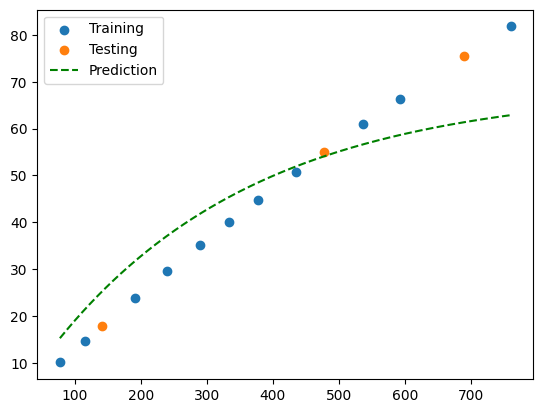

In [5]:
de1 = DifferentialEvolution(f1, 50, 90, [0, 100], [0, 1], training1, testing1, 0.9, 0.8)
de1.plot()

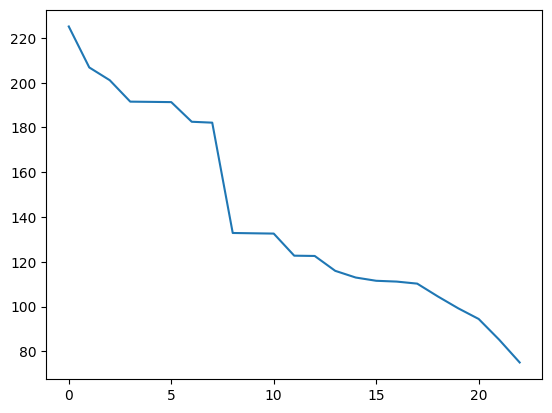

In [6]:
de1.plot_loss()

## Варіант № 5

In [5]:
data5 = pd.read_csv('var5.csv')

In [6]:
def f5(population):
    x, b1, b2 = population
    return b1*(1 - 1/(1+(b2 ** 2 * x ** 2)/2))

In [7]:
data5 = data5.sample(frac = 1).reset_index(drop=True)
n5 = int(np.ceil((len(data5['x'])*3)/4))
training5 = np.array([data5['x'][0:n5], data5['y'][0:n5]]).T
testing5 = np.array([data5['x'][n5:], data5['y'][n5:]]).T

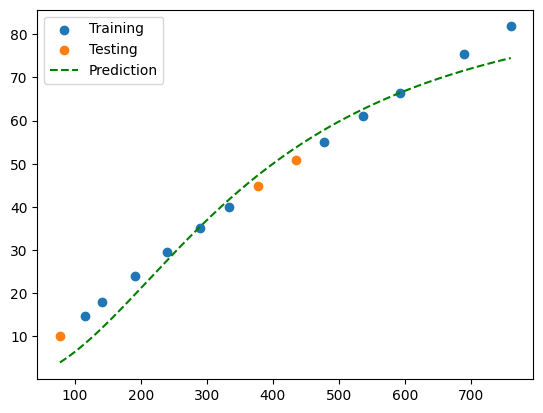

In [11]:
de5 = DifferentialEvolution(f5, 50, 90, [0, 100], [0, 1], training5, testing5, 0.9, 0.8)
de5.plot()

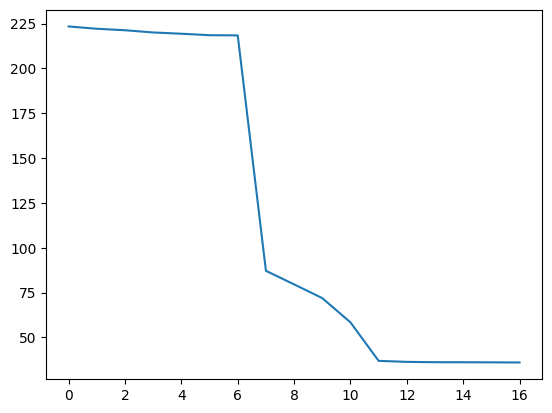

In [12]:
de5.plot_loss()

## Варіант № 10

In [8]:
data10 = pd.read_csv('var10.csv')

In [9]:
def f10(population):
    x, b1, b2 = population
    return b1*(1-1/(1+2*b2*x)**(1/2))

In [10]:
data10 = data10.sample(frac = 1).reset_index(drop=True)
n10 = int(np.ceil((len(data10['x'])*3)/4))
training10 = np.array([data10['x'][0:n10], data10['y'][0:n10]]).T
testing10 = np.array([data10['x'][n10:], data10['y'][n10:]]).T

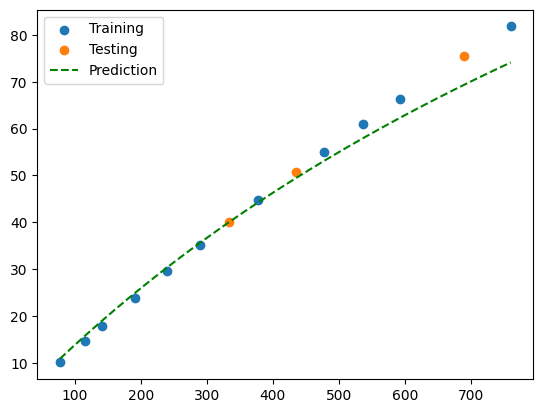

In [16]:
de10 = DifferentialEvolution(f10, 50, 90, [100, 1000], [0, 1], training10, testing10, 0.9, 0.8)
de10.plot()

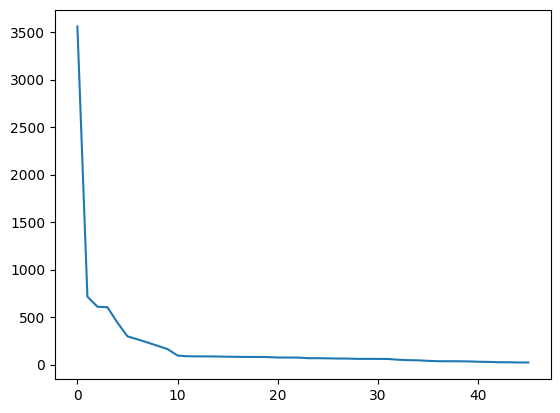

In [17]:
de10.plot_loss()

# PSO

## Варіант № 1:

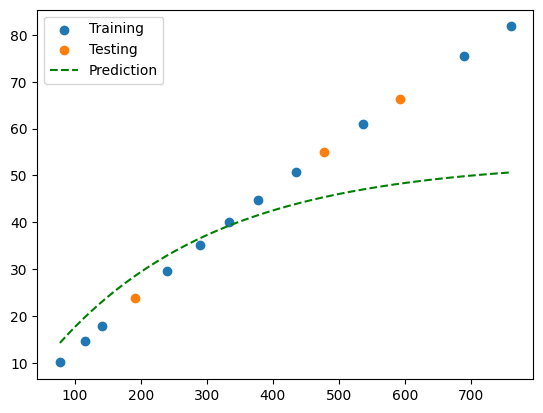

In [18]:
p1 = PSO(f1, 200, 1, 1, 900, 0.1, 2, training1, testing1, [0, 100], [0, 1])
p1.plot()

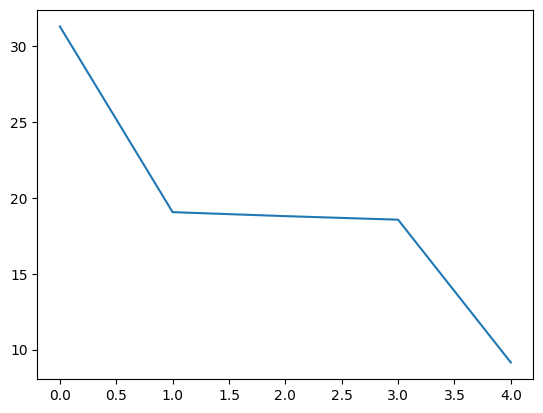

In [19]:
p1.plot_loss()

# Варіант № 5:

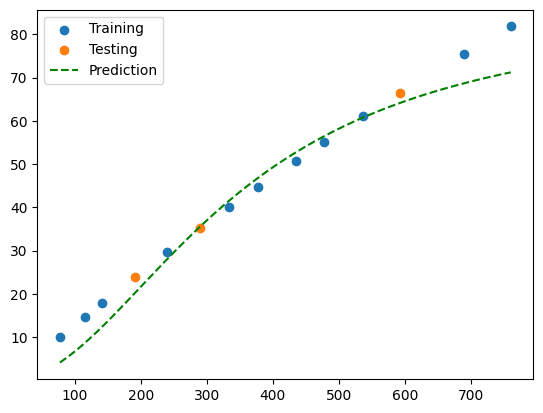

In [20]:
p5 = PSO(f5, 200, 1, 1, 900, 0.1, 2, training5, testing5, [0, 100], [0, 1])
p5.plot()

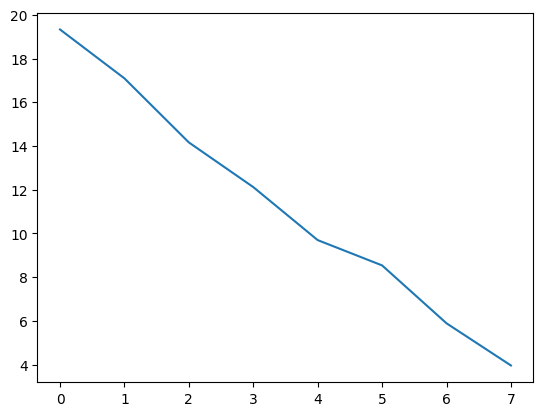

In [21]:
p5.plot_loss()

# Варіант № 10:

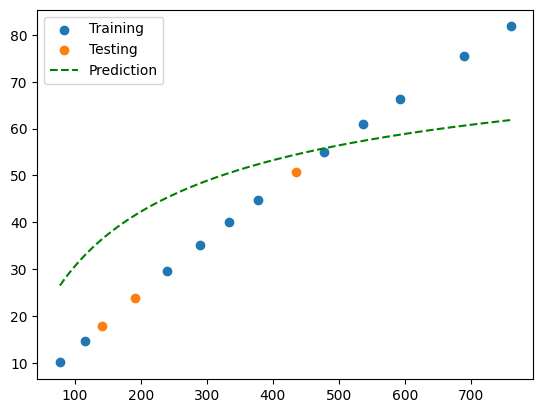

In [23]:
p10 = PSO(f10, 200, 1, 1, 900, 0.1, 2, training10, testing10, [0, 100], [0, 1])
p10.plot()

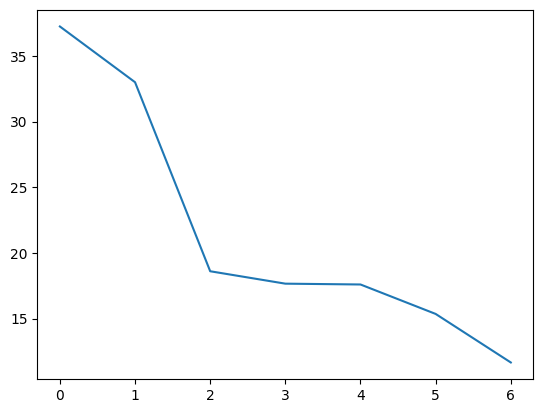

In [24]:
p10.plot_loss()